In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("C:\\Users\sushm\OneDrive\Desktop\class\class\project\COVID_df.csv")
df.head()

,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,specimen_batch_ID,Number_deaths
0,2020-04-17,9979,3386,527,0,96
1,2020-02-08,1,0,0,1,0
2,2020-03-05,63,5,3,2,1
3,2020-04-09,9019,4803,1253,3,386
4,2020-04-03,9389,5523,1688,4,582


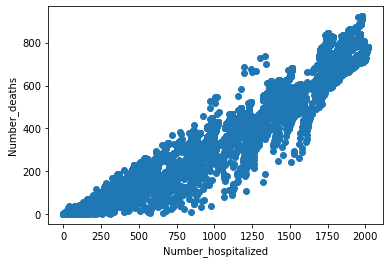

In [3]:
plt.scatter(df.Number_hospitalized,df.Number_deaths)
plt.xlabel('Number_hospitalized')
plt.ylabel('Number_deaths')
plt.show()

In [4]:
X = df.Number_hospitalized.values.reshape(-1, 1)


In [5]:
y = df.Number_deaths.values.reshape(-1, 1)

In [6]:
X.shape

(176094, 1)

In [7]:
X[:5]

array([[ 527],
       [   0],
       [   3],
       [1253],
       [1688]], dtype=int64)

In [8]:
model = LinearRegression()

In [9]:
model.fit(X, y)

LinearRegression()

In [10]:
y_pred = model.predict(X)
print(y_pred.shape)

(176094, 1)


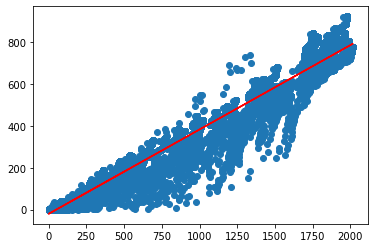

In [11]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [12]:
print(model.coef_)
print(model.intercept_)

[[0.40316768]]
[-20.78847218]


In [13]:
r_squared=model.score(X,y)
print(r_squared)

0.9743210929006552


In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Initial imports.
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [17]:
df = df.drop("specimen_date", axis=1)
df.head()

,Number_tested,Number_confirmed,Number_hospitalized,specimen_batch_ID,Number_deaths
0,9979,3386,527,0,96
1,1,0,0,1,0
2,63,5,3,2,1
3,9019,4803,1253,3,386
4,9389,5523,1688,4,582


In [18]:
# Define the features set.
X = df.copy()
X = X.drop("Number_deaths", axis=1)
X.head()

,Number_tested,Number_confirmed,Number_hospitalized,specimen_batch_ID
0,9979,3386,527,0
1,1,0,0,1
2,63,5,3,2
3,9019,4803,1253,3
4,9389,5523,1688,4


In [19]:
# Define the target set.
y = df["Number_deaths"].ravel()
y[:5]

array([ 96,   0,   1, 386, 582], dtype=int64)

In [20]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)


In [21]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=5, random_state=42) 

In [23]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [33]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)
predictions

array([  4,  22,  29, ...,  27, 280,   2], dtype=int64)

In [25]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

In [26]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
acc_score

0.8397919316736325

In [27]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.25165114, 0.29678784, 0.23191529, 0.21964574])

In [34]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
 

[(0.2967878351464155, 'Number_confirmed'),
 (0.2516511351446628, 'Number_tested'),
 (0.23191528818948712, 'Number_hospitalized'),
 (0.21964574151943478, 'specimen_batch_ID')]